<a href="https://colab.research.google.com/github/viviannemedeiros/estatisticaDescritiva/blob/master/analiseSalarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - Estatística Descritiva - 11/01/2020** 

**Prof:** Tsang Ing Ren

**Grupo:**
Alexandra Vitorio

Victor Marques

Vivianne Medeiros


**Objetivo:** Predizer quando renda excede $50000 dólares anuais baseados nos dados do censo.

**Fonte dos dados:** https://archive.ics.uci.edu/ml/machine-learning-databases/adult/


## Leitura de arquivo e operações iniciais

In [34]:
import numpy as np
import pandas as pd
adultos=pd.read_csv("https://raw.githubusercontent.com/viviannemedeiros/estatisticaDescritiva/master/adult.data", 
                      encoding = "ISO-8859-1", sep=",", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                                                            'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                                                                            'capital-gain', 'capital-loss', 'hours-per-week', 
                                                                            'native-country', 'class'])
adultos.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [0]:
# Verificando a quantidade de dados
adultos.shape

(32561, 15)

In [0]:
adultos.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Setando campos como categóricos

In [0]:
adultos.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [0]:
#Ajustando tipos dos dados
adultos['workclass'] = adultos['workclass'].astype('category')
adultos['education'] = adultos['education'].astype('category')
adultos['marital-status'] = adultos['marital-status'].astype('category')
adultos['occupation'] = adultos['occupation'].astype('category')
adultos['relationship'] = adultos['relationship'].astype('category')
adultos['race'] = adultos['race'].astype('category')
adultos['sex'] = adultos['sex'].astype('category')
adultos['native-country'] = adultos['native-country'].astype('category')
adultos['class'] = adultos['class'].astype('category')


In [97]:
adultos.dtypes

age                      int64
workclass             category
fnlwgt                   int64
education             category
education-num            int64
marital-status        category
occupation            category
relationship          category
race                  category
sex                   category
capital-gain             int64
capital-loss             int64
hours-per-week           int64
native-country        category
class                 category
log_hours-per-week     float64
dtype: object

**Variáveis Quantitativas:** 
  - Discretas: age, education-num, hours-per-week
  - Contínuas: fnlwgt, capital-gain, capital-loss

**Variáveis Qualitativas:** 
  - Nominais: workclass, marital-status, occupation, relationship, race, sex, native-country 
  - Ordinais: education


In [0]:
np.random.seed(4)
amostra1 = adultos.loc[np.random.randint(0, 32561, 3256)]

In [0]:
np.random.seed(2)
amostra2 = adultos.loc[np.random.randint(0, 32562, 3256)]

In [0]:
np.random.seed(7)
amostra3 = adultos.loc[np.random.randint(0,32562,3256)]

{'boxes': [<matplotlib.lines.Line2D at 0x7f8532615518>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8532615eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f85326218d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8532621588>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8532615828>,
  <matplotlib.lines.Line2D at 0x7f85325ce198>]}

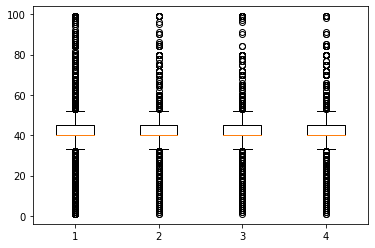

In [35]:

import matplotlib.pyplot as plt
plt.boxplot([adultos['hours-per-week'], amostra1['hours-per-week'], amostra2['hours-per-week'], amostra3['hours-per-week']])


## Tratamento de dados ausentes

In [36]:
# Verificando quantidade de dados nulos
print(adultos.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


In [52]:
print(len(adultos))

32561


In [53]:
adultos[adultos.duplicated(keep=False)]
print(len(adultos))

32561


**Ressalva:** Como não há dados ausentes e nem linhas repetidas, optou-se por remover outliers. Além disso, o enriquecimento dos dados não será necessário em virtude de não existir dados ausentes.

## Removendo Outliers


In [37]:
adultos['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

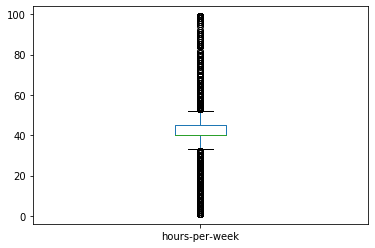

In [38]:
adultos['hours-per-week'].plot.box()

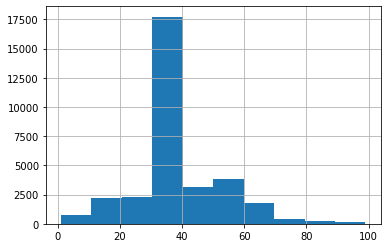

In [40]:
(adultos['hours-per-week']).hist()

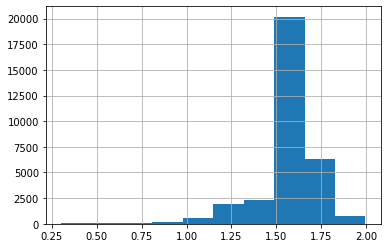

In [0]:
adultos['log_hours-per-week'] = adultos['hours-per-week'].apply(np.log10)
adultos[adultos['log_hours-per-week'] > 0]['log_hours-per-week'].hist()

In [42]:
# Utilizando z-score robusto (univariado)
from numpy import abs
mad = abs(adultos['log_hours-per-week'] - adultos['log_hours-per-week'].median()).median()*(1/0.6745)
print(mad)

0.05019757933427357


In [51]:
adultosSemOutliers = adultos[abs(adultos['log_hours-per-week']-adultos['log_hours-per-week'].median())/mad < 3.5]
print(len(adultosSemOutliers))
print(len(adultos))

26003
32561


{'boxes': [<matplotlib.lines.Line2D at 0x7f8530f4e048>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8530f4e978>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f8530f57390>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f8530f57048>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f8530fe90b8>,
  <matplotlib.lines.Line2D at 0x7f8530f57d68>]}

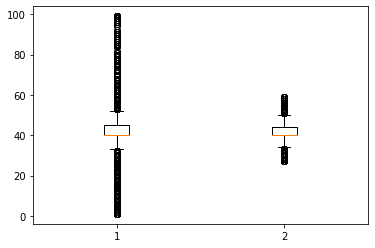

In [54]:
plt.boxplot([adultos['hours-per-week'], adultosSemOutliers['hours-per-week']])

**Análise:**
A população inicial contava com 32561 registros e, após limpeza por remoção de outliers, ficou com 26003.
O gráfico acima apresenta boxplots comparativos com a variável horas trabalhadas, tanto com a base original como com a base após limpeza.  


## Estatísticas

In [89]:
adultos['hours-per-week'].agg(['min', 'max', 'mean','median', 'std', 'var'])

min         1.000000
max        99.000000
mean       40.437456
median     40.000000
std        12.347429
var       152.458995
Name: hours-per-week, dtype: float64

In [92]:
# Coeficiente de variação
print(adultos['hours-per-week'].std()/adultos['hours-per-week'].mean())
# Amplitude
print(adultos['hours-per-week'].max() - adultos['hours-per-week'].min())


0.3053463285844112
98


In [77]:
import statistics
# Moda
statistics.mode(adultos['hours-per-week'])

40

In [82]:
adultosSemOutliers['hours-per-week'].agg(['min', 'max', 'mean','median', 'std', 'var'])

min       27.000000
max       59.000000
mean      41.363689
median    40.000000
std        5.366542
var       28.799769
Name: hours-per-week, dtype: float64

In [85]:
# Coeficiente de variação
print(adultosSemOutliers['hours-per-week'].std()/adultosSemOutliers['hours-per-week'].mean())
# Amplitude
print(adultosSemOutliers['hours-per-week'].max() - adultosSemOutliers['hours-per-week'].min())


0.12974040236628695
32


In [81]:
# Moda
statistics.mode(adultosSemOutliers['hours-per-week'])

40

## Visualização dos dados



In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
#Imprimindo um mapa de calor usando a correlação de Spearman
adultos.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,log_hours-per-week
age,1.0,-0.078,0.066,0.12,0.058,0.14,0.14
fnlwgt,-0.078,1.0,-0.036,-0.006,-0.0069,-0.022,-0.022
education-num,0.066,-0.036,1.0,0.12,0.075,0.17,0.17
capital-gain,0.12,-0.006,0.12,1.0,-0.067,0.093,0.093
capital-loss,0.058,-0.0069,0.075,-0.067,1.0,0.06,0.06
hours-per-week,0.14,-0.022,0.17,0.093,0.06,1.0,1.0
log_hours-per-week,0.14,-0.022,0.17,0.093,0.06,1.0,1.0


In [98]:
adultos.dtypes

age                      int64
workclass             category
fnlwgt                   int64
education             category
education-num            int64
marital-status        category
occupation            category
relationship          category
race                  category
sex                   category
capital-gain             int64
capital-loss             int64
hours-per-week           int64
native-country        category
class                 category
log_hours-per-week     float64
dtype: object

In [102]:
adultos['class'].cat.categories

Index([' <=50K', ' >50K'], dtype='object')

In [110]:
adultosMenorIgual50k = adultos[adultos['class'] == ' <=50K']
len(adultosMenorIgual50k)

24720

In [111]:
adultosMaior50k = adultos[adultos['class'] == ' >50K']
len(adultosMaior50k)

7841

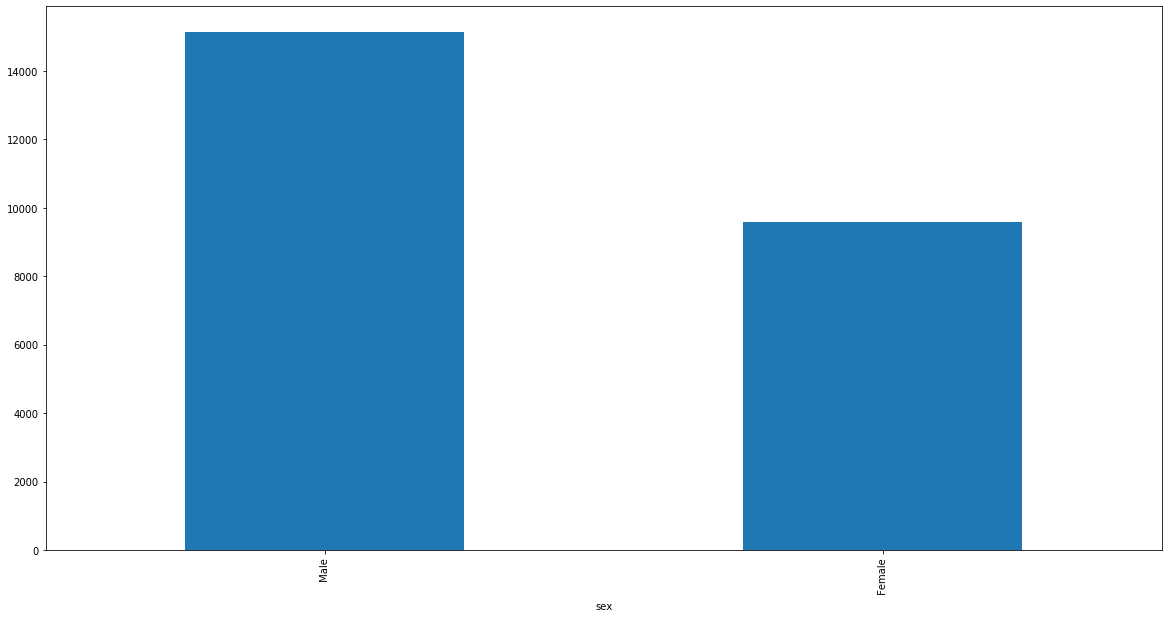

In [118]:
adultosMenorIgual50k.groupby(['sex'])['sex'].count().sort_values(ascending=False).plot.bar(figsize=(20,10))

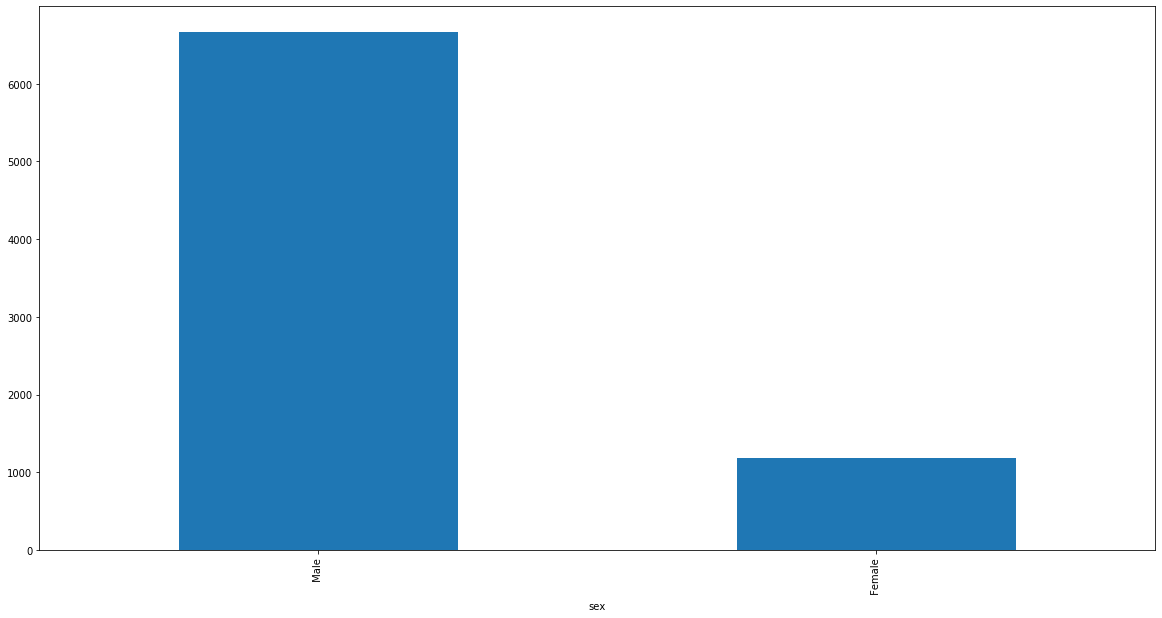

In [119]:
adultosMaior50k.groupby(['sex'])['sex'].count().sort_values(ascending=False).plot.bar(figsize=(20,10))


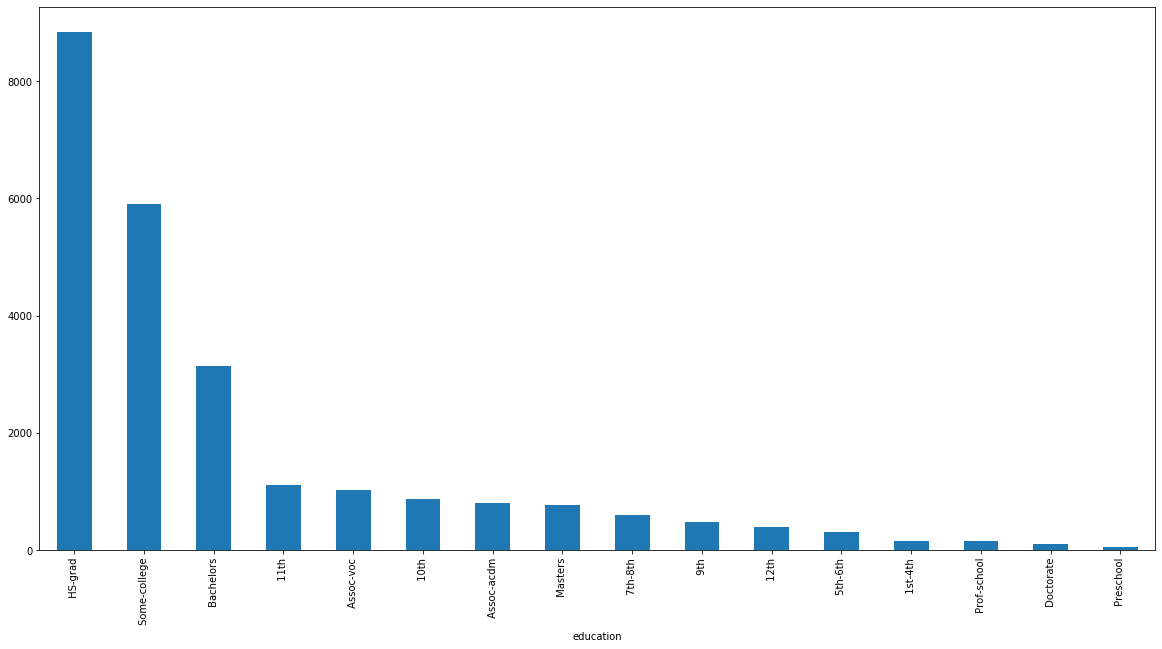

In [126]:
adultosMenorIgual50k.groupby(['education'])['education'].count().sort_values(ascending=False).plot.bar(figsize=(20,10))

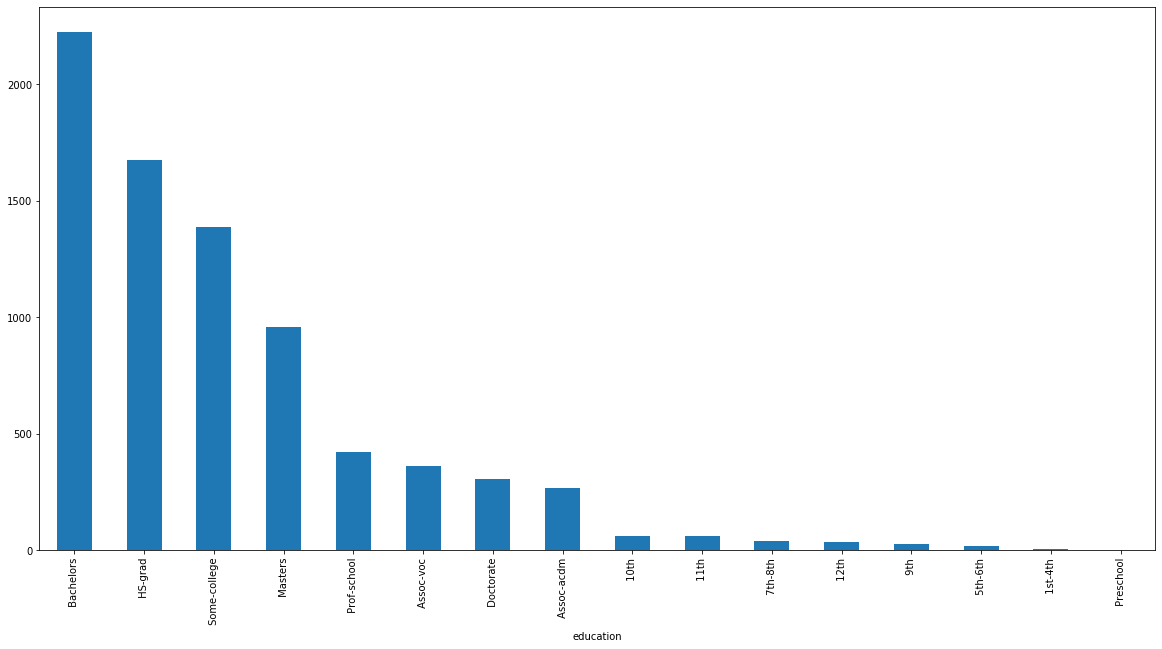

In [125]:
adultosMaior50k.groupby(['education'])['education'].count().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [129]:
adultos['age_dist'] = pd.cut(adultos['age'], 5)
adultos['age_dist'].value_counts()

(31.6, 46.2]      12211
(16.927, 31.6]    11460
(46.2, 60.8]       6558
(60.8, 75.4]       2091
(75.4, 90.0]        241
Name: age_dist, dtype: int64

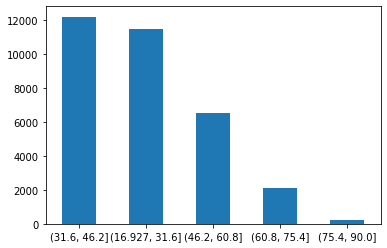

In [130]:
counts = adultos['age_dist'].value_counts()
counts.plot.bar(rot=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


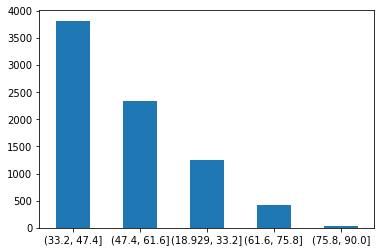

In [133]:
adultosMaior50k['age_dist'] = pd.cut(adultosMaior50k['age'], 5)
countsMaior50k = adultosMaior50k['age_dist'].value_counts()
countsMaior50k.plot.bar(rot=0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


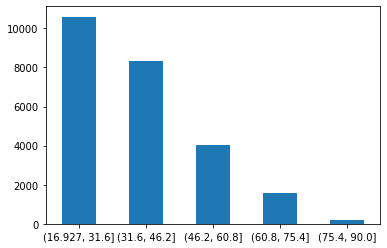

In [134]:
adultosMenorIgual50k['age_dist'] = pd.cut(adultosMenorIgual50k['age'], 5)
countsMenor50k = adultosMenorIgual50k['age_dist'].value_counts()
countsMenor50k.plot.bar(rot=0)